In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
type(boston)

sklearn.datasets.base.Bunch

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

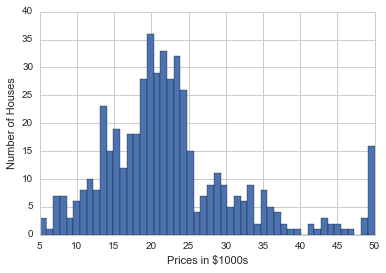

In [9]:
plt.hist(boston.target, bins = 50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

C:\Users\Varun\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


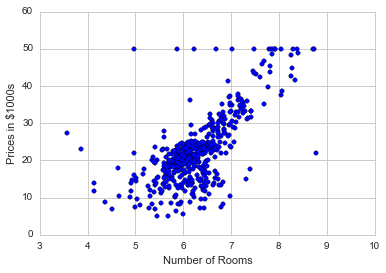

In [10]:
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Number of Rooms')
plt.ylabel('Prices in $1000s')

In [11]:
boston_df = DataFrame(boston.data)

In [12]:
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [13]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


C:\Users\Varun\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


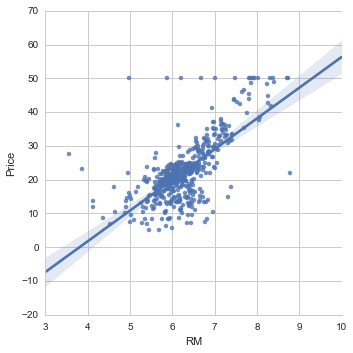

In [14]:
sns.lmplot('RM','Price',data = boston_df)

In [20]:
a=input("Enter a value:")

Enter a value:a


In [21]:
a

'a'

C:\Users\Varun\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


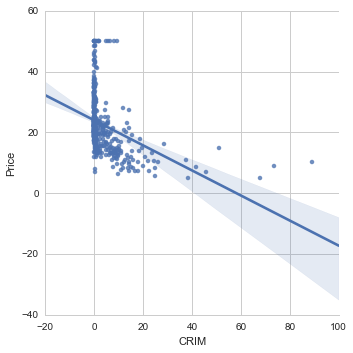

In [22]:
sns.lmplot('CRIM','Price',data = boston_df)

In [23]:
X = boston_df.RM
X.head()




0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [24]:
X.shape

(506,)

In [25]:
X = np.vstack(boston_df['RM'])
X.shape

(506, 1)

In [26]:
X[:5]

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147]])

In [27]:
Y = boston_df['Price']

In [28]:
X = np.array([[i,1] for i in X])

In [29]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [30]:
m,c = np.linalg.lstsq(X,Y)[0]

In [31]:
print(m,c)

9.10210898118 -34.6706207764


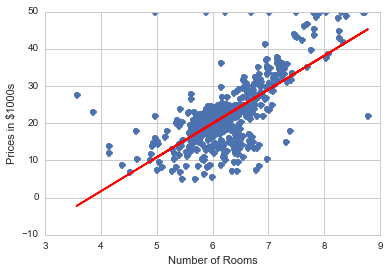

In [32]:
plt.plot(boston_df['RM'],Y,'o')
x = boston_df['RM']
plt.plot(x,m*x+c,'r',label = 'Best Fit Line')
plt.xlabel('Number of Rooms')
plt.ylabel('Prices in $1000s')

Great! We've just completed a single variable regression using the least squares method with Python! Let's see if we can find the error in our fitted line. Checking out the documentation [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier. 

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [37]:
result = np.linalg.lstsq(X,Y)

In [38]:
err = result[1]

In [40]:
err

array([ 22061.87919621])

computer error manually

In [44]:
y1 = m*x + c
y1

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
5      23.855940
6      20.051258
7      21.507596
8      16.583355
9      19.978442
10     23.373528
11     20.023952
12     18.931699
13     19.477826
14     20.815836
15     18.431083
16     19.350396
17     19.851012
18     14.990486
19     17.457157
20     16.028126
21     19.623459
22     21.234533
23     18.239939
24     19.250273
25     16.292087
26     18.239939
27     20.369832
28     24.447577
29     26.076855
         ...    
476    24.347454
477    13.606965
478    21.625923
479    22.026416
480    22.144743
481    26.768615
482    29.599371
483    17.775731
484    18.767861
485    22.781891
486    20.979674
487    19.077333
488    14.972282
489    14.608197
490    11.686420
491    19.787297
492    19.787297
493    17.275115
494    19.268477
495    16.938337
496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.8256

In [47]:
y = boston_df['Price']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, dtype: float64

In [48]:
diff = y1-y

In [49]:
manual_err = diff.dot(diff)
manual_err

22061.879196211798

In [53]:
diff.shape

(506,)

In [55]:
np.sqrt(5)

2.2360679774997898

In [57]:
rmse = np.sqrt(manual_err/len(diff))
rmse

6.6030713892225608

Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

### Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [60]:
import sklearn
from sklearn.linear_model import LinearRegression

In [61]:
lreg = LinearRegression()

In [62]:
X_multi = boston_df.drop('Price',axis=1)

In [63]:
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [65]:
Y_target = boston_df['Price']
Y_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [66]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print('Intercept : ',lreg.intercept_)

Intercept :  36.4911032804


In [68]:
print('#Coefficients : ',len(lreg.coef_))


#Coefficients :  13


In [73]:
coeff_df = DataFrame(boston_df.columns)
coeff_df

,0
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [74]:
coeff_df.columns = ['Features']
coeff_df

,Features
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [75]:
coeff_df['Coefficient_Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient_Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [81]:
X_trn,X_tst,Y_trn,Y_tst = sklearn.cross_validation.train_test_split(X,Y)

In [82]:
print(X_trn.shape,X_tst.shape,Y_trn.shape,Y_tst.shape)

(379, 2) (127, 2) (379,) (127,)


In [83]:
127/(379+127)

0.2509881422924901

In [109]:
X_trn,X_tst,Y_trn,Y_tst = sklearn.cross_validation.train_test_split(X_multi,Y,test_size = 0.2)

In [110]:
print(X_trn.shape,X_tst.shape,Y_trn.shape,Y_tst.shape)


(404, 13) (102, 13) (404,) (102,)


In [111]:
lreg1 = LinearRegression()

In [112]:
lreg1.fit(X_trn,Y_trn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
Y_pred_tst = lreg1.predict(X_tst)
Y_pred_trn = lreg1.predict(X_trn)
err_tst_vec = Y_pred_tst - Y_tst
err_trn_vec = Y_pred_trn - Y_trn

In [114]:
mse_tst = err_tst_vec.dot(err_tst_vec)/len(err_tst_vec)
mse_trn = err_trn_vec.dot(err_trn_vec)/len(err_trn_vec)

In [115]:
mse_trn

22.293476555295374

In [116]:
mse_tst

21.547218600644385

In [117]:
rmse_tst = np.sqrt(np.mean(err_tst_vec*err_tst_vec))
rmse_trn = np.sqrt(np.sum(err_trn_vec*err_trn_vec)/len(err_trn_vec))

print(rmse_trn,rmse_tst)

4.72159682261 4.64189816785


### Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$

You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

C:\Users\Varun\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


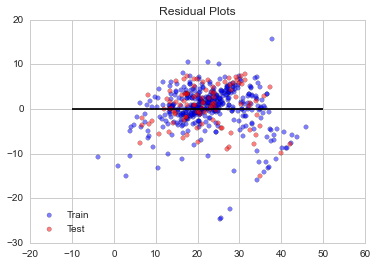

In [118]:
train = plt.scatter(Y_pred_trn,(Y_pred_trn-Y_trn),c='b',alpha = 0.5)
test = plt.scatter(Y_pred_tst,(Y_pred_tst-Y_tst), c='r',alpha = 0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Train','Test'),loc = 'lower left')
plt.title('Residual Plots')

Great! Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal.

That's it for this lesson. Linear regression is a very broad topic, theres a ton of great information in the sci kit learn documentation, and I encourage you to check it out here:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model